
QFT Quantum Circuit:


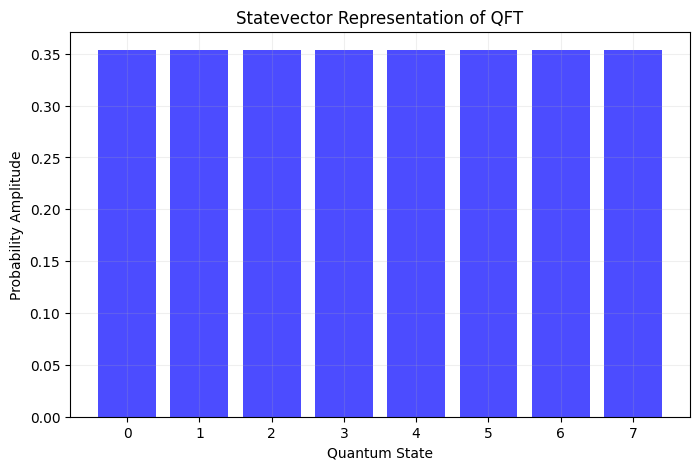

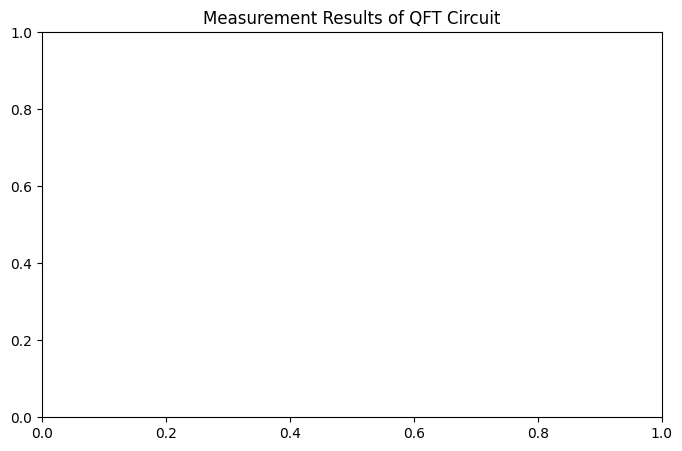

In [1]:
#-------------------------------------------------------------------------
# QFT Circuit for 3-Qubits with Visualization
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import circuit_drawer, plot_histogram

#-------------------------------------------------------------------------
# Function to implement QFT
#-------------------------------------------------------------------------
def qft(circuit, n):
    """Quantum Fourier Transform implementation"""
    for i in range(n):
        circuit.h(i)  # Apply Hadamard gate
        for j in range(i + 1, n):
            angle = 2. * np.pi / 2**(j - i + 1)
            circuit.cp(angle, j, i)  # Apply controlled phase rotation
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)  # Reverse qubit order

#-------------------------------------------------------------------------
# Visualization Functions
#-------------------------------------------------------------------------

# Function to plot quantum circuit
def plot_quantum_circuit(qc):
    print("\nQFT Quantum Circuit:")
    circuit_drawer(qc, output='mpl', style={'backgroundcolor': 'white'})

# Function to simulate and show statevector
def simulate_statevector(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    statevector = result.get_statevector()
    
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(statevector)), np.abs(statevector), color='blue', alpha=0.7)
    plt.xlabel("Quantum State")
    plt.ylabel("Probability Amplitude")
    plt.title("Statevector Representation of QFT")
    plt.grid(alpha=0.2)
    plt.show()

# Function to measure qubits and show probability distribution
def measure_and_plot(qc):
    qc_measure = qc.copy()
    qc_measure.measure_all()
    
    backend = Aer.get_backend('aer_simulator')
    job     = execute(qc_measure, backend, shots=1024)
    result  = job.result()
    counts  = result.get_counts()
    
    plt.figure(figsize=(8, 5))
    plot_histogram(counts)
    plt.title("Measurement Results of QFT Circuit")
    plt.show()

#-------------------------------------------------------------------------
# Create 3-qubit QFT circuit
#-------------------------------------------------------------------------
n = 3
qc = QuantumCircuit(n)
qft(qc, n)

#-------------------------------------------------------------------------
# Execute Visualizations
#-------------------------------------------------------------------------
plot_quantum_circuit(qc)
simulate_statevector(qc)
measure_and_plot(qc)